Import and load data

In [62]:
from keras.datasets import imdb
 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Prepare data

In [63]:
import numpy as np
 
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
 
# Vectorized data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


Prepare neural network

In [64]:
from keras import models
from keras import layers
 
network = models.Sequential()
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

Divide dataset



In [65]:
(x_validation, x_train) = np.split(x_train, [10000])
(y_validation, y_train) = np.split(y_train, [10000])



Fit the model


In [66]:
history = network.fit(x_train, y_train, 
            epochs=20, 
            batch_size=512, 
            validation_data=(x_validation, y_validation)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.5148 - accuracy: 0.7829 - val_loss: 0.4139 - val_accuracy: 0.8463
Epoch 2/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.3127 - accuracy: 0.9005 - val_loss: 0.3213 - val_accuracy: 0.8789
Epoch 3/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.2313 - accuracy: 0.9256 - val_loss: 0.2944 - val_accuracy: 0.8832
Epoch 4/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1840 - accuracy: 0.9418 - val_loss: 0.2944 - val_accuracy: 0.8824
Epoch 5/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1471 - accuracy: 0.9531 - val_loss: 0.2776 - val_accuracy: 0.8897
Epoch 6/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1245 - accuracy: 0.9619 - val_loss: 0.2869 - val_accuracy: 0.8873
Epoch 7/20
15000/15000 [==============================] - 1s 96us/

Analyze and plot history

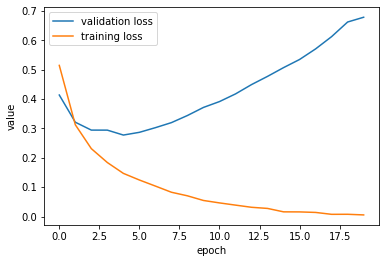

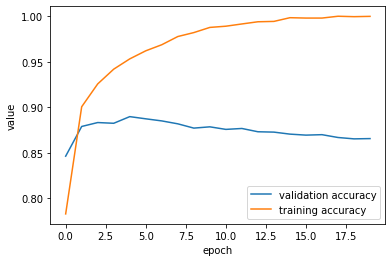

In [67]:
%matplotlib inline 
from matplotlib import pyplot as plt

history_dict = history.history
metrics = history_dict.keys()

validation_loss = history_dict['val_loss']
training_loss = history_dict['loss']

plt.plot(range(len(validation_loss)), validation_loss, label='validation loss')
plt.plot(range(len(training_loss)), training_loss, label='training loss')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()

validation_acc = history_dict['val_accuracy']
training_acc = history_dict['accuracy']
plt.plot(range(len(validation_acc)), validation_acc, label='validation accuracy')
plt.plot(range(len(training_acc)), training_acc, label='training accuracy')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()


Analyze test set

In [68]:
test_loss, test_acc = network.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test acc:", test_acc)

25000/25000 [==============================] - 1s 58us/step
Test loss: 0.7390748513638973
Test acc: 0.8530399799346924
